## Regresión lineal multiple


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
testing = pd.read_csv('https://raw.githubusercontent.com/adolfollin/Bourbaki/master/primerCurso/Datos/datos-testingSet.csv')
training = pd.read_csv('https://raw.githubusercontent.com/adolfollin/Bourbaki/master/primerCurso/Datos/datos-trainingSet.csv')

## Definimos nuestras variables categoricas y continuas

In [149]:
variables_continuas = [ 'OverallQual', 'Years', 'YearRemodAdd', 'FullBath', 'MasVnrArea', 
                       'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'Fireplaces']

In [150]:
training.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [151]:
training.dtypes.apply(lambda x: x in ['object'])

Id               False
MSSubClass       False
MSZoning          True
LotFrontage      False
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition     True
SalePrice        False
Length: 81, dtype: bool

In [152]:
variables_categoricas = training.dtypes[training.dtypes.apply(lambda x: 
                                                              x in ['object'])].index.tolist()

In [153]:
variables_categoricas

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

## Datos de prueba

In [154]:
testing.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,11,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
1,41,20,RL,84.0,8658,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,12,2006,WD,Abnorml,160000


In [155]:
# concatenar dataframes
df = pd.concat([training, testing])

In [156]:
df['Years'] = df.YrSold - df.YearBuilt

## Calidad de datos

<BarContainer object of 19 artists>

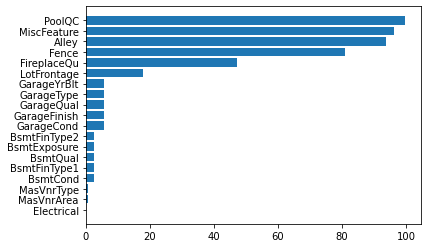

In [157]:
variables_con_nulos = []
valores = []
for col in df.columns.tolist():
    nulls = sum(df[col].isnull())
    if nulls != 0: 
        valores.append((nulls/ df.shape[0])*100)
        variables_con_nulos.append(col)
        
valores, variables = zip(*sorted(zip(valores, variables_con_nulos)))
plt.barh(variables, valores)

In [158]:
df[variables_con_nulos].head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [159]:
for e in variables_con_nulos:
    if e in variables_categoricas:
        print(e)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [160]:
for e in variables_con_nulos:
    if e in variables_continuas:
        print(e)

MasVnrArea


In [161]:
variables_categoricas = list(set(variables_categoricas) - set(['PoolQC', 
                                                               'MissFeature', 'Alley',
                                                               'Fence', 'FireplaceQu']))

In [162]:
variables_con_nulos = list(set(variables_categoricas).intersection(set(variables_con_nulos)))

## Procesamiento de variables continuas

<AxesSubplot:>

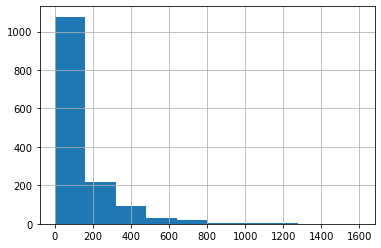

In [163]:
df.MasVnrArea.hist()

In [164]:
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace= True)

## Procesamiento de variables categoricas

In [165]:
variables_con_nulos

['Electrical',
 'BsmtQual',
 'GarageFinish',
 'MiscFeature',
 'GarageQual',
 'GarageType',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtFinType2',
 'GarageCond',
 'BsmtExposure',
 'MasVnrType']

In [166]:
df[variables_con_nulos].head()

,Electrical,BsmtQual,GarageFinish,MiscFeature,GarageQual,GarageType,BsmtFinType1,BsmtCond,BsmtFinType2,GarageCond,BsmtExposure,MasVnrType
0,SBrkr,Gd,RFn,NaN,TA,Attchd,GLQ,TA,Unf,TA,No,BrkFace
1,SBrkr,Gd,RFn,NaN,TA,Attchd,ALQ,TA,Unf,TA,Gd,None
2,SBrkr,Gd,RFn,NaN,TA,Attchd,GLQ,TA,Unf,TA,Mn,BrkFace
3,SBrkr,TA,Unf,NaN,TA,Detchd,ALQ,Gd,Unf,TA,No,None
4,SBrkr,Gd,RFn,NaN,TA,Attchd,GLQ,TA,Unf,TA,Av,BrkFace


<AxesSubplot:>

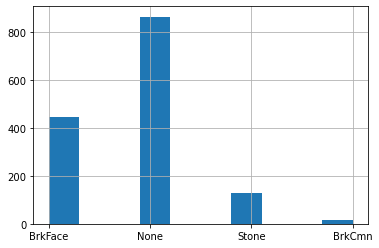

In [167]:
df.MasVnrType.hist()

<AxesSubplot:>

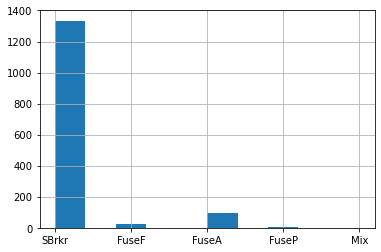

In [168]:
df.Electrical.hist()

## Analizando variables categoricas

In [169]:
print('Valores unicos de las variables categoricas\n')

for col in variables_categoricas:
    print(col, len(training[col].unique()))
    

Valores unicos de las variables categoricas

HeatingQC 5
LandContour 4
BldgType 5
Foundation 6
Condition1 9
RoofMatl 8
ExterQual 4
KitchenQual 4
MSZoning 5
BsmtQual 5
Utilities 2
PavedDrive 3
LotShape 4
Exterior2nd 16
GarageQual 6
BsmtCond 5
GarageCond 6
Condition2 7
LandSlope 3
RoofStyle 6
CentralAir 2
Electrical 5
ExterCond 5
Neighborhood 25
MiscFeature 5
SaleCondition 6
Exterior1st 15
GarageType 7
BsmtFinType1 7
SaleType 9
BsmtFinType2 7
BsmtExposure 5
MasVnrType 5
Functional 7
Heating 6
GarageFinish 4
Street 2
LotConfig 5
HouseStyle 8


<AxesSubplot:>

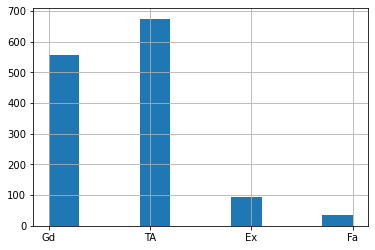

In [170]:
training.KitchenQual.hist()

<AxesSubplot:>

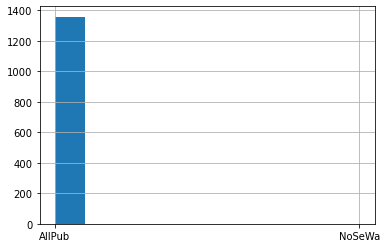

In [171]:
training.Utilities.hist()

In [172]:
variables_categoricas = list(set(variables_categoricas) - set(['Utilities']))

## Seleccionando variables para el modelo

In [173]:
df = df[variables_continuas + variables_categoricas + ['SalePrice', 'Id']]

In [174]:
df = pd.get_dummies(df, columns = variables_categoricas, drop_first= True)

In [175]:
df.head()

,OverallQual,Years,YearRemodAdd,FullBath,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,Fireplaces,SalePrice,...,LotConfig_FR3,LotConfig_Inside,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,7,5,2003,2,196.0,856,1710,548,0,208500,...,0,1,0,0,0,0,0,0,0,1
1,6,31,1976,2,0.0,1262,1262,460,1,181500,...,0,0,0,0,0,0,0,0,0,1
2,7,7,2002,2,162.0,920,1786,608,1,223500,...,0,1,0,0,0,0,0,0,0,1
3,7,91,1970,1,0.0,756,1717,642,1,140000,...,0,0,0,0,0,0,0,0,0,1
4,8,8,2000,2,350.0,1145,2198,836,1,250000,...,0,0,0,0,0,0,0,0,0,1


In [176]:
df.columns

Index(['OverallQual', 'Years', 'YearRemodAdd', 'FullBath', 'MasVnrArea',
       'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'Fireplaces', 'SalePrice',
       ...
       'LotConfig_FR3', 'LotConfig_Inside', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=209)

In [177]:
df_training = df.loc[training,:]

ValueError: Cannot index with multidimensional key